In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris["data"],columns = iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)

In [8]:
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
df["label"]=cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans,label
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [10]:
cluster.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

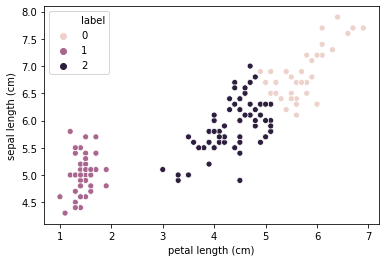

In [14]:
#countplot次數圖，圖形中間有間隔
#distplot直方圖，圖形完全相鄰（不連續） -> 機率密度曲線（連續kde=True）
#install package seaborn, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(x=df["petal length (cm)"],
                y=df["sepal length (cm)"],
                hue=df["label"])

In [16]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"],cluster.labels_)
    x.append(k)
    y.append(s)
print("k:",x)
print("Score",y) #k=2最高，上面步驟為k=3

k: [2, 3, 4, 5, 6, 7, 8, 9]
Score [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3678464984712235, 0.3566882476581684, 0.36179003359737993, 0.32884457416923085]


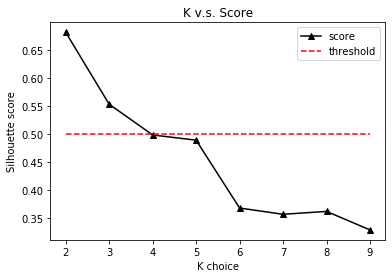

In [20]:
threshold = [0.5] * len(x)
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
p1, = plt.plot(x,y,"^-k",label = "score") #轉為tuple
p2, = plt.plot(x,threshold,"--r",label = "threshold") #轉為tuple
plt.title("K v.s. Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette score")
plt.legend(handles=[p1,p2])